# Convolutional Neural Network (CNN)


Convolutional Neural Networks (CNNs) are a class of deep neural networks commonly used in `image recognition` and `processing`. When discussing CNNs, several key terms and concepts come into play:

 - **Convolutional Layer:** This layer applies convolutional operations to the input, producing feature maps. It is the core building block of a CNN.
    - **Convolutional Operation:** This operation involves a `kernel` (or `filter`) that is passed over the input data, performing element-wise multiplication with the part of the input it is currently `focused` on. The result is a single value in the output feature map.


In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

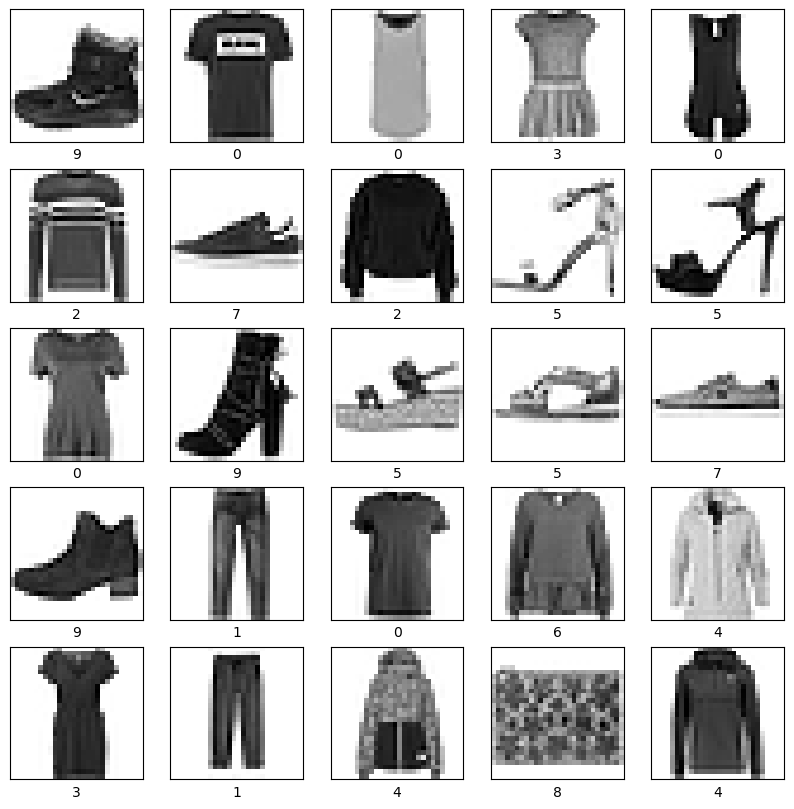

In [38]:
# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [39]:
# explore the data
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set.")
print(f"The size of the images is {X_train[0].shape}.")

We have 60000 images in the training set and 10000 images in the test set.
The size of the images is (28, 28).


In [40]:
X_train.shape

(60000, 28, 28)

In [41]:
y_train.shape

(60000,)

In [42]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [43]:
60000-1

59999

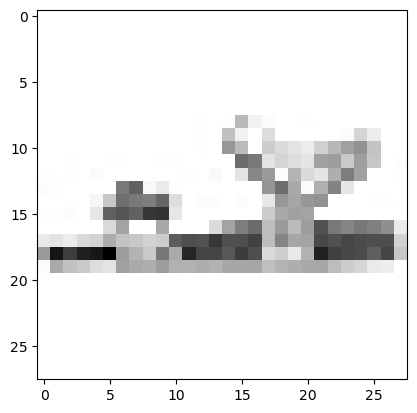

In [44]:
plt.imshow(X_train[59999], cmap=plt.cm.binary)

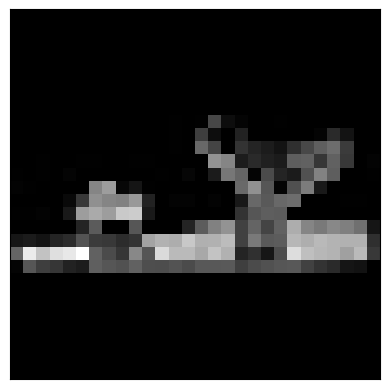

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   1  71  13   4   0   0   

In [45]:
# Display the first image in the dataset as a data matrix
plt.imshow(X_train[59999], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image
print("Pixel values:")
for row in X_train[59999]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

In [46]:
# also need to change the data type to float32 Data Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [47]:
# Display the values of each pixel in the image after normalization
print("\nPixel values after normalization:")
for row in X_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()



Pixel values after normalization:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.004 0.000 0.000 0.051 0.286 0.000 0.000 0.004 0.016 0.000 0.000 0.000 0.000 0.004 0.004 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.000 0.141 0.533 0.498 0.243 0.212 0.000 0.000 0.000 0.004 0.012 0.016 0.000 0.000 0.012 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.024 0.000 0.400 0.800 0.690 0.525 0.565 0.482 

# Build the model

In [48]:
# create an input layer
input_layer = tf.keras.layers.Input(shape=(28, 28, 1)) # 28x28 pixel images with a single color channel

# CNN model building

model = tf.keras.Sequential([
    input_layer, # input layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer 
    # filter is the number of filters we want to apply
    # kernel is the size of window/filter moving over the image
    layers.Conv2D(filters=10, kernel_size=(3, 3),  activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax') # output layer # why did we add 10?
])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 10)          0         
 g2D)                                                 

In [50]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Epoch 1/100
1874/1875 [============================>.] - ETA: 0s - loss: 0.4823 - accuracy: 0.8245

2024-01-26 18:08:01.681957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 20s 11ms/step - loss: 0.4822 - accuracy: 0.8245 - val_loss: 0.4639 - val_accuracy: 0.8293
Epoch 2/100
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4091 - accuracy: 0.8520 - val_loss: 0.4077 - val_accuracy: 0.8558
Epoch 3/100
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3715 - accuracy: 0.8656 - val_loss: 0.3832 - val_accuracy: 0.8647
Epoch 4/100
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3489 - accuracy: 0.8746 - val_loss: 0.3852 - val_accuracy: 0.8680
Epoch 5/100
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3311 - accuracy: 0.8809 - val_loss: 0.3416 - val_accuracy: 0.8790
Epoch 6/100
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3165 - accuracy: 0.8854 - val_loss: 0.3541 - val_accuracy: 0.8734
Epoch 7/100
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3065 - accuracy: 0.8890 - val_loss: 0.3349 - val_

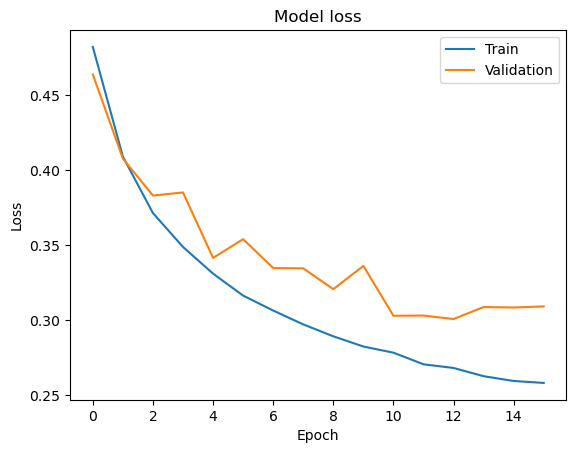

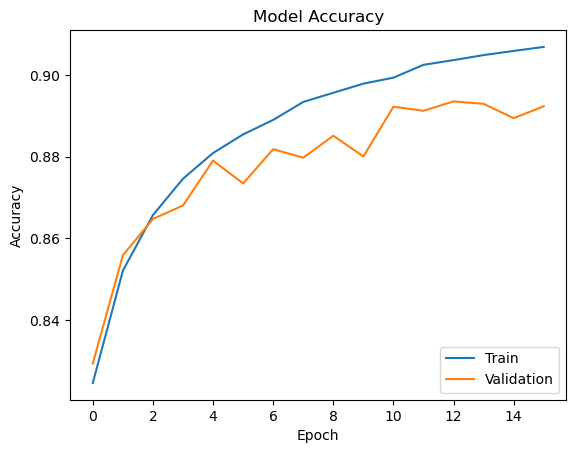

CPU times: user 4min 54s, sys: 2min 3s, total: 6min 58s
Wall time: 5min 27s


In [52]:
%%time
# Define the callback function
early_stopping = EarlyStopping(patience=3)

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [53]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.3093 - accuracy: 0.8923
Test Loss: 0.3093012273311615
Test Accuracy: 0.892300009727478


In [54]:
# Save the model to be used later
model.save('models_saved/fashion_mnist_cnn.h5')

/Users/babaaammar/mambaforge/envs/tf_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Predicting an image

(28, 28)
(28, 28, 1)


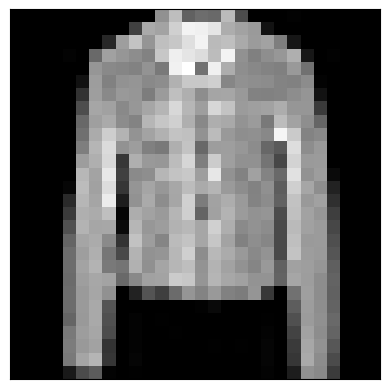

1/1 [==============================] - 0s 14ms/step
The model predicts that this image is a 4.


In [64]:
# grab an image
img = X_test[10]
print(img.shape)
# # rehape the image to (28, 28, 1)
img = img.reshape((28, 28, 1))
print(img.shape)
plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()
# predict the image
predictions = model.predict(img.reshape(1, 28, 28, 1))
print(f"The model predicts that this image is a {predictions.argmax()}.")